# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from sklearn.utils import resample
import seaborn as sns

In [2]:
#specify the data location
DATA_FOLDER = './data/'

#load data
PUBLICATIONS_DATASET = DATA_FOLDER+"dataset_final.csv"
publications_data_raw = pd.read_csv(PUBLICATIONS_DATASET, header=0, sep=',', error_bad_lines=False)

In [3]:
publications_data = publications_data_raw.copy()
publications_data.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,Stanford University;Stanford University;Stanfo...,4;4;4,4,655;904;12908,42;19;162,8;10;42,True
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,Ulsan National Institute of Science and Techno...,468;468,8,1052;727,86;88,16;15,False
2,2018,Towards Neural Phrase-based Machine Translation,Po-Sen Huang;Chong Wang;Sitao Huang;Dengyong Z...,6.666667,Accept,"Microsoft;Google;University of Illinois, Urban...",-1;-1;3;-1;-1,3;2,1718;17889;161;8800;20766,59;1045;17;78;409,17;54;7;33;63,True
3,2018,Interactive Grounded Language Acquisition and ...,Haonan Yu;Haichao Zhang;Wei Xu,6.333333,Accept,Baidu;Baidu;Baidu,-1;-1;-1,6;8,890;1382;9553,37;63;557,12;20;44,False
4,2018,A Boo(n) for Evaluating Architecture Performance,Ondrej Bajgar;Rudolf Kadlec;and Jan Kleindienst,4.666667,Reject,;International Business Machines;International...,-1;-1;-1,0,366;678;658,10;40;76,5;11;9,False


- Task 1.1.1 Create 3 new fields `authors_citations_median`  `authors_publications_median` and `authors_hindex_median`
       
   - convert string `authors_citations`  `authors_publications` and `authors_hindex` to list and split by ";" 
   - compute median for each entitiy

In [4]:
### Task 1.1.1 ###

# the median value of the number of citations per author, 
publications_data['authors_citations'] = [np.fromstring(x, dtype=int, sep=';') 
                                          for x in publications_data.authors_citations]
publications_data['authors_citations_median'] = publications_data['authors_citations'].apply(np.median)

# the median value of the number of publications per author,
publications_data['authors_publications'] = [np.fromstring(x, dtype=int, sep=';') 
                                             for x in publications_data.authors_publications]
publications_data['authors_publications_median'] = publications_data['authors_publications'].apply(np.median)

# the median value of the h-index per author 
publications_data['authors_hindex'] = [np.fromstring(x, dtype=int, sep=';') 
                                       for x in publications_data.authors_hindex]
publications_data['authors_hindex_median'] = publications_data['authors_hindex'].apply(np.median)


- Task 1.1.2 Create another field `reputation`
    - define `reputaion` according to the last author with $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$

In [5]:
### Task 1.1.2 ###

# reputaion according to the last author
publications_data['reputation']=np.log10(np.array([c[-1] for c in publications_data.authors_citations])/np.array([p[-1] 
                                                            for p in publications_data.authors_publications])+1)

- Task 1.1.3 Create two fields  `has_top_company` and `has_top_institution`
    - Converting string `csranking` and `institution` to list and split by ";" 
    - If there is at least one raning in `cranking` is between [1,10], then `has_top_institution` is True otherwise False. Since the interval is [1,10], we also filter out those companies with ranking -1, but `has_top_institution` will preserve the information of the companies.
    - If the there is at least one institution is on the top companies list `["Facebook", "Google", "Microsoft", "Deepmind"]`, then `has_top_company` is True otherwise Flase, we did not consider cases with Facebook AI Research or Microsoft Research as Top Companies, since they are research institutions and for research institutions, we already considered in `has_top_institution`. We focus companies here in the sense of industry companies. 

In [6]:
### Task 1.1.3 ###


# convert string to a list
publications_data['csranking'] =  [np.fromstring(x, dtype=int, sep=';') for x in publications_data.csranking]
publications_data['institution'] = [x.split(';') for x in publications_data.institution]

In [7]:
#check if the there is at least a ranking is top 10 
publications_data['has_top_institution'] = [np.any(np.logical_and(ranks>0 ,ranks<11)) for ranks in publications_data.csranking] #ranking interval is [1,10]

In [8]:
#check if there is at lear a top company in instituiton
top_comanies = ["Facebook", "Google", "Microsoft", "Deepmind"]
publications_data['has_top_company'] = [len(set(x).intersection(top_comanies))>0 for x in publications_data.institution]

In [9]:
publications_data.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_institution,has_top_company
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,"[Stanford University, Stanford University, Sta...","[4, 4, 4]",4,"[655, 904, 12908]","[42, 19, 162]","[8, 10, 42]",True,904.0,42.0,10.0,1.906761,True,False
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,[Ulsan National Institute of Science and Techn...,"[468, 468]",8,"[1052, 727]","[86, 88]","[16, 15]",False,889.5,87.0,15.5,0.966675,False,False
2,2018,Towards Neural Phrase-based Machine Translation,Po-Sen Huang;Chong Wang;Sitao Huang;Dengyong Z...,6.666667,Accept,"[Microsoft, Google, University of Illinois, Ur...","[-1, -1, 3, -1, -1]",3;2,"[1718, 17889, 161, 8800, 20766]","[59, 1045, 17, 78, 409]","[17, 54, 7, 33, 63]",True,8800.0,78.0,33.0,1.714100,True,True
3,2018,Interactive Grounded Language Acquisition and ...,Haonan Yu;Haichao Zhang;Wei Xu,6.333333,Accept,"[Baidu, Baidu, Baidu]","[-1, -1, -1]",6;8,"[890, 1382, 9553]","[37, 63, 557]","[12, 20, 44]",False,1382.0,63.0,20.0,1.258896,False,False
4,2018,A Boo(n) for Evaluating Architecture Performance,Ondrej Bajgar;Rudolf Kadlec;and Jan Kleindienst,4.666667,Reject,"[, International Business Machines, Internatio...","[-1, -1, -1]",0,"[366, 678, 658]","[10, 40, 76]","[5, 11, 9]",False,658.0,40.0,9.0,0.984882,False,False


- Task 1.1.4 **Discuss:** How did you handle -1 values in item 1.1.1?

CSranking with -1 are those industry institutions, which are not counted in the `has_top_instiution` anyway,
so we need to check there is at least a  csranking is between 1 and 10.

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


- Task 1.2.1 random split data with ratio = 0.7

In [10]:
### Task 1.2.1 ###
'''
Function goal: randomly split data into training set and testing set
Function input: data = dataset to split  ratio = ratio for training set
Function output: training set, testing set
'''

# split data with ratio 0.7
def split_set(data, ratio=0.7):
    #randomly sample 70% train data from dataset
    train = data.sample(frac=ratio)
    #drop train data from dataset
    test = data.drop(train.index)
    return train.reset_index(drop=True), test.reset_index(drop=True)

In [11]:
split_set(publications_data)[0].shape

(2979, 18)

the ratio of trainning data is 2979/4256 = 0.7 

- Task 1.2.2 Longitudinally split data

In [12]:
### Task 1.2.2 ###
'''
Function goal: Longitudinally split data into training set and testing set
Function input: data = dataset to split
Function output: training set, testing set
'''
def longitudinal_split(data):
    train_long = data.loc[(data['year'] == 2018) | (data['year'] == 2019)]
    test_long = data.loc[(data['year'] == 2020)]
        
    return train_long.reset_index(drop=True),test_long.reset_index(drop=True)

In [13]:
longitudinal_split(publications_data)[0].shape

(2204, 18)

### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

- Task 1.3.1  Report the model  𝑅2  for the testing set split randomly and longitudinally 

In [14]:
### Task 1.3.1 ###

#specify the data we need to use 
features = ['authors_citations_median','authors_publications_median','authors_hindex_median','reputation']
prediction='ratings'
model_data = publications_data[features+[prediction]+['year']]

In [15]:
'''
Function goal: spilit data to features and label to make it ready to fit a model
Function input: train_data= dataset to train, features = fetures use to train the model, prediction = label for the model
Function output: x_data = training data with features, y_data = true label
'''

#split features and label for training
def split_x_y(train_data,features,prediction):
    x_data = train_data[features]
    y_data = train_data[prediction]
    return x_data,y_data

In [16]:
'''
Function goal: train data with linear regression
Function input: train_data= dataset to train, features = fetures use to train the model, prediction = label for the model
Function output: lin_reg = the fitted  linear regression model, str = a string with each coefficient times corresponding predictor value
'''

#train with linear regression and print coefficients
def train_lin_reg(X,y,features):
    lin_reg = LinearRegression().fit(X, y)
    res = ''
    for f in range(len(features)):
        res +=  str(round(lin_reg.coef_[f],3))+" * "+features[f]+" +"+"\n"
    return lin_reg,res+str(round(lin_reg.intercept_,3))

Processing data with 2 split method and make them ready to train

In [17]:
#split data randomly  with ratio 0.7
train_data_random,test_data_random = split_set(model_data)

#longitudinal split data 
train_data_long,test_data_long = longitudinal_split(model_data)

#needed "year" only for longitudinal, drop year after splitting data
train_data_random.drop("year", axis = 1, inplace=True)
test_data_random.drop("year",axis= 1,inplace = True)
train_data_long.drop("year",axis= 1,inplace = True)
test_data_long.drop("year",axis= 1,inplace = True)

#split x y for training
x_train_random,y_train_random = split_x_y(train_data_random,features,prediction)
x_test_random,y_test_random = split_x_y(test_data_random,features,prediction)
x_train_long,y_train_long = split_x_y(train_data_long,features,prediction)
x_test_long,y_test_long = split_x_y(test_data_long,features,prediction)

$$y = \beta_0 + \beta_1  \times authors citations median+ \beta_2  \times  authors publications median + \beta_3  \times authors hindex median + \beta_4  \times reputation$$


In [18]:
#train linear regression model with randomly split data
lin_reg_random,res_random = train_lin_reg(x_train_random,y_train_random,features)
print(res_random)

-0.0 * authors_citations_median +
-0.003 * authors_publications_median +
0.049 * authors_hindex_median +
0.602 * reputation +
3.723


In [19]:
#train linear regression model with longitudinal split data
lin_reg_long,res_long = train_lin_reg(x_train_long,y_train_long,features)
print(res_long)

-0.0 * authors_citations_median +
-0.003 * authors_publications_median +
0.043 * authors_hindex_median +
0.531 * reputation +
4.345


In [20]:
#make prediction with each model on test data
y_pred_long = lin_reg_long.predict(x_test_long)
y_pred_random = lin_reg_random.predict(x_test_random)

#report r2 score of each model
r2_long = r2_score(y_test_long, y_pred_long)
r2_random = r2_score(y_test_random, y_pred_random)
print('R2 score for random split data is {:.4f}\nR2 score for longitudinal split data is {:.4f}'.format(r2_random,r2_long) )

R2 score for random split data is 0.0736
R2 score for longitudinal split data is -0.2388


- Task 1.3.2 **Discuss**: Hypothesize a reason why the results are different. Additionally, interpret the  𝑅2  value for the longitudinal split. How can it be negative?

    - why the results are different  
      - For longitudinally split data,  only 2204/4256= 51% data is used for trainning. And for random split data, 70% data is used for training.
      - longitudinally split data using year to split, the model made from the data 2018,2019 does not fit 20202 well, as time passes by the  publications and citations of same author could increase.
    - negative $R2$ score   
    𝑅2 is negative when the chosen model does not follow the trend of the data, so  (residual sum of squares is greater than the total sum of squares.It simply means that the chosen model fits the data really poorly, just using mean as prediction is even a btter predictor, we can visually see this from the plot below

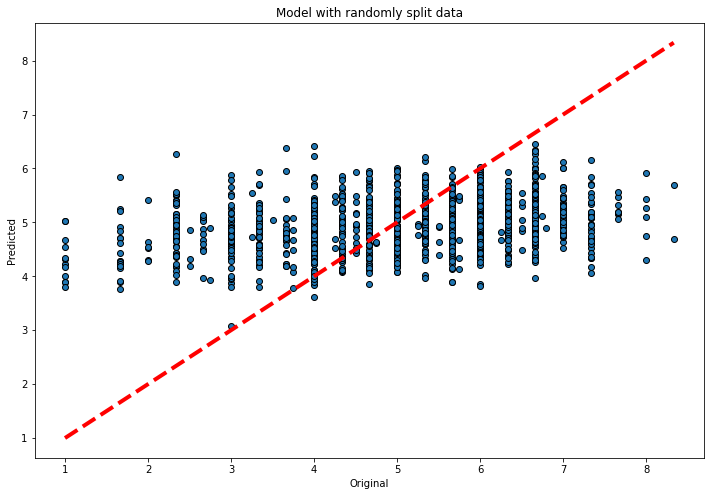

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_test_random, y_pred_random, edgecolors=(0, 0, 0))
ax.plot([min(y_test_random), max(y_test_random)], [min(y_test_random), max(y_test_random)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
ax.set_title("Model with randomly split data")
plt.show()

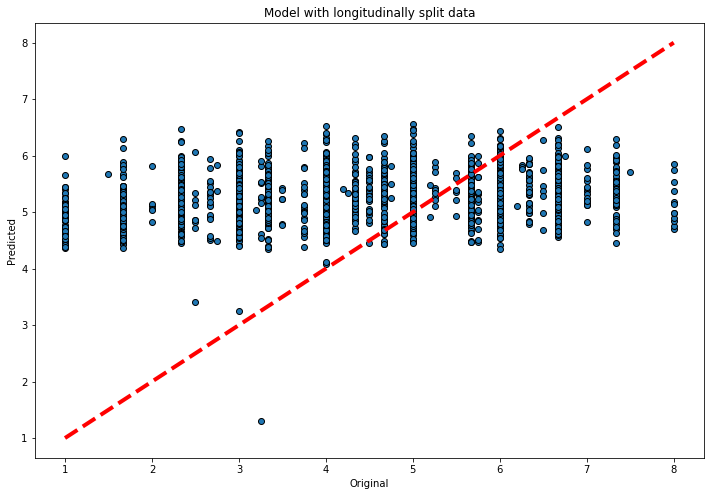

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_test_long, y_pred_long, edgecolors=(0, 0, 0))
ax.plot([min(y_test_long), max(y_test_long)], [min(y_test_long), max(y_test_long)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
ax.set_title("Model with longitudinally split data")
plt.show()

- Task 1.3.3  Consider only the random split. For a given entry  𝑋  your model outputs a predicted score  𝑌′ . The difference between the real score  𝑌  and the predicted score  𝑌′  is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


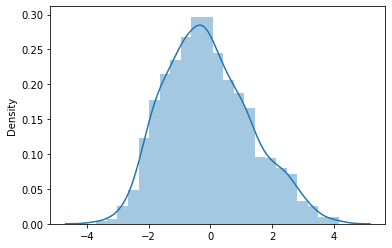

In [23]:
### 1.3.3 ###

#  Plot the distribution of residuals for the test set
residuals = np.array(y_pred_random - y_test_random)
ax = sns.distplot(residuals)

In [24]:
# make estimate according to the distribution above
estimate = (np.abs(residuals)>2).sum() /len(residuals)
print('According to the distribution we have now, the probability that the prediction is off by more than 2-points is {:.2f}%'.format(estimate*100) )

According to the distribution we have now, the probability that the prediction is off by more than 2-points is 15.66%


- Using bootstrapped confidence intervals to check the certantity
    - resample residuals with replacement for n_itreation times
    - compute the estimation after each resample
    - after N_iteration compute confidential interval with new distribution
    - eg. 90% CI is the 5%*N_iteration-th estimation and  95%*N_iteration-th estimation

In [25]:
'''
Function goal: bootstrapped confidence intervals, bootstrap by resampling data with replacement and compute confidence intervals
Function input: data = original data to bootstrap,sample_size = size of sample in each iteration,n_itera = times to do resample,
                type_precent = the way to compute estimation for task 1.3 and 1.5,alpha = define ci by default 0.90 for task 1
Function output: lower = lower bound for 90%CI, upper = upper bound for 90%CI, estimation_bst = all estimations after bootstrap
'''
 
def bootstrap_CI(data,sample_size,n_itera,type_precent,alpha = 0.90):
    
    # definde 2 ways to compute the estimation for task 1.3 and task 1.5
    def calculate_estimation(type_precent,data_samples,sample_size):
        #task 1.3 compute the probability the prediction is off 2
        if type_precent == 'off2':
            return (np.abs(data_samples)>2).sum() /sample_size  
        #task 1.5 compute mean of r2 score
        if type_precent == 'mean':
            return data_samples.mean()
        
    # run bootstrap
    estimation_bst = []
    for i in range(n_itera):
        #resample sample_size data with replacement 
        data_samples = resample(data, n_samples=sample_size)
        #make estmation with current data_sample
        estimation = calculate_estimation(type_precent,data_samples,sample_size)
        estimation_bst.append(estimation)
    
    #  confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(estimation_bst, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(estimation_bst, p))
    return lower,upper, estimation_bst

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


90% confidence the probability that the prediction is off by more than 2-points is between 14.02% and 17.38%


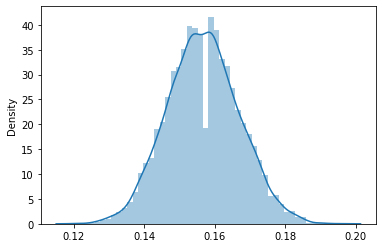

In [26]:
# configure bootstrap
n_itera = 10000
sample_size = len(residuals)
lower, upper, estimation_bst = bootstrap_CI(residuals,sample_size,n_itera,'off2')

#plot estimation distribution
sns.distplot(estimation_bst)
print('{:}% confidence the probability that the prediction is off by more than 2-points is between {:.2f}% and {:.2f}%'.format( 90,lower*100, upper*100))

- Task 1.3.4 **Discuss**: Identify three additional features that are already computed in your dataframe and discuss why each of these features might add valuable information to your model.

Extended features
`has_top_company` `has_top_institution` `arxiv` are intuitively good choices for features,  as they are three binary features. And in reality `has_top_company` or `has_top_institution` do play a big role in the quality  of papers. As mentioned before, `arxiv` may break double-blind submissions, so the paper could be rated with bias.


- Task 1.3.5 Report the  𝑅2  (for the test set) for a newly trained model with these additional features.

    - Using the same data from task 1.3.1 and preprocessing data for this task
    - drop column 'year' since it is not our chosen features and we do not need it to split data
    - add extended features

In [27]:
### 1.3.5 ###

# random split does not need 'year' any more
model_data.drop("year",axis=1,inplace=True)
model_data_ext = model_data.copy()

# define extended features
extention= ['has_top_company','has_top_institution','arxiv'] 

model_data_ext['has_top_company'] = publications_data.copy()['has_top_company'].astype(int)
model_data_ext['has_top_institution'] = publications_data.copy()['has_top_institution'].astype(int)
model_data_ext['arxiv'] = publications_data.copy()['arxiv'].astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
model_data_ext

,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,ratings,has_top_company,has_top_institution,arxiv
0,904.0,42.0,10.0,1.906761,9.000000,0,1,1
1,889.5,87.0,15.5,0.966675,4.666667,0,0,0
2,8800.0,78.0,33.0,1.714100,6.666667,1,1,1
3,1382.0,63.0,20.0,1.258896,6.333333,0,0,0
4,658.0,40.0,9.0,0.984882,4.666667,0,0,0
...,...,...,...,...,...,...,...,...
4251,2095.0,102.5,22.0,1.368938,5.000000,0,0,0
4252,25.0,9.5,1.5,0.577236,4.666667,1,0,0
4253,1320.0,67.0,8.0,0.670325,4.000000,0,0,1
4254,563.0,14.0,9.0,1.359447,2.333333,0,0,1


Processing the new data and train the model 

In [29]:
#add addtional features
new_features = features + extention

#processing data to make it ready for training
train_data_ext, test_data_ext = split_set(model_data_ext)
x_train_ext, y_train_ext = split_x_y(train_data_ext,new_features,prediction)
x_test_ext, y_test_ext = split_x_y(test_data_ext,new_features,prediction)

#train model
lin_reg_ext, res_ext = train_lin_reg(x_train_ext,y_train_ext,new_features) 
print(res_ext)

#make prediction
y_pred_ext = lin_reg_ext.predict(x_test_ext)

-0.0 * authors_citations_median +
-0.002 * authors_publications_median +
0.044 * authors_hindex_median +
0.467 * reputation +
0.234 * has_top_company +
0.172 * has_top_institution +
0.383 * arxiv +
3.782


In [30]:
#report r2 score 
r2_ext = r2_score(y_test_ext, y_pred_ext)
print("R2 score of linear regression model for random split data with extended features is {:.4f}".format(r2_ext))

R2 score of linear regression model for random split data with extended features is 0.0985


### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

- Task 1.4.1 GradientBoostingRegressor with features as task 1.3.1

    - using same random spilit data from task 1.3.1 since they use same features and we can better compare with this two models 

In [31]:
x_train_random

,authors_citations_median,authors_publications_median,authors_hindex_median,reputation
0,372.0,19.0,8.0,1.468679
1,1594.5,159.0,11.5,1.056185
2,28.0,9.0,3.0,1.255273
3,710.5,19.0,9.0,1.484986
4,4034.0,56.0,25.0,2.235394
...,...,...,...,...
2974,217.0,20.5,5.0,1.119633
2975,8009.0,47.0,15.0,2.009144
2976,620.0,33.0,12.0,0.652878
2977,2706.5,143.5,22.0,1.512739


In [32]:
###Task 1.4.1 ###
#train with gradient boosting regression 
gbc = GradientBoostingRegressor().fit(x_train_random, y_train_random)

#make predicton on testing data
y_pred_gbc = gbc.predict(x_test_random)

In [33]:
#report r2 score
r2_gbc= r2_score(y_test_random, y_pred_gbc)
print("R2 score with Gradient Boosting Regression is {:.4f}".format(r2_gbc))

R2 score with Gradient Boosting Regression is 0.0757


- Task 1.4.2 Create an additional feature called  𝑐𝑟𝑎𝑧𝑦 : If the score of the paper,  𝑟𝑎𝑡𝑖𝑛𝑔𝑠 , is bigger than 4.96, then  𝑐𝑟𝑎𝑧𝑦=9−𝑟𝑎𝑡𝑖𝑛𝑔𝑠 , otherwise,  𝑐𝑟𝑎𝑧𝑦=−𝑟𝑎𝑡𝑖𝑛𝑔𝑠 . Train a Gradient Boosting Regressor and Linear Regression model to predict paper scores using only  𝑐𝑟𝑎𝑧𝑦  as a feature. Report the  𝑅2  in the testing set.


In [34]:
### Task 1.4.2 ###

#perprocessing data 
rating_data = publications_data.copy()[['ratings']]
rating_data['crazy_mask'] =  rating_data[['ratings']]> 4.96
rating_data['crazy_mask'] = rating_data['crazy_mask'].astype(int)
rating_data['crazy'] = 9*rating_data['crazy_mask']-rating_data['ratings']
rating_data

,ratings,crazy_mask,crazy
0,9.000000,1,0.000000
1,4.666667,0,-4.666667
2,6.666667,1,2.333333
3,6.333333,1,2.666667
4,4.666667,0,-4.666667
...,...,...,...
4251,5.000000,1,4.000000
4252,4.666667,0,-4.666667
4253,4.000000,0,-4.000000
4254,2.333333,0,-2.333333


In [35]:
#processing data make it ready for training
features_cz=['crazy']
train_data_cz, test_data_cz= split_set(rating_data)
x_train_cz, y_train_cz= split_x_y(train_data_cz,features_cz,'ratings')
x_test_cz, y_test_cz = split_x_y(test_data_cz,features_cz,'ratings')

#train GBR model
gbc = GradientBoostingRegressor().fit(x_train_cz, y_train_cz)
y_pred_cz_gbc = gbc.predict(x_test_cz)

In [36]:
#train linear regression model
rating_lin_reg, _ = train_lin_reg(x_train_cz,y_train_cz,features_cz)
y_pred_cz_lin = rating_lin_reg.predict(x_test_cz)

In [37]:
#report r2 score
r2_cz_lin = r2_score(y_test_cz, y_pred_cz_lin)
r2_cz_gbc = r2_score(y_test_cz, y_pred_cz_gbc)
print("R2 score regression using linear is {:.4f}\nR2 scoreusing Gradient Boosting Regressor is {:.4f}".format(r2_cz_lin,r2_cz_gbc))

R2 score regression using linear is 0.4186
R2 scoreusing Gradient Boosting Regressor is 1.0000


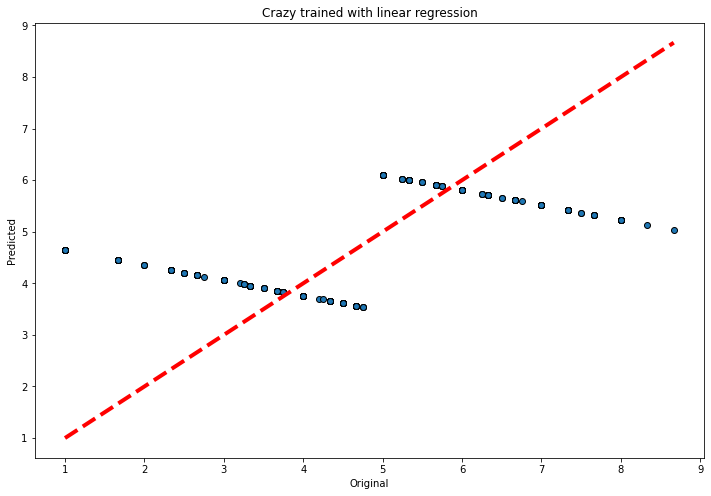

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_test_cz, y_pred_cz_lin, edgecolors=(0, 0, 0))
ax.plot([min(y_test_cz), max(y_test_cz)], [min(y_test_cz), max(y_test_cz)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
ax.set_title('Crazy trained with linear regression')
plt.show()

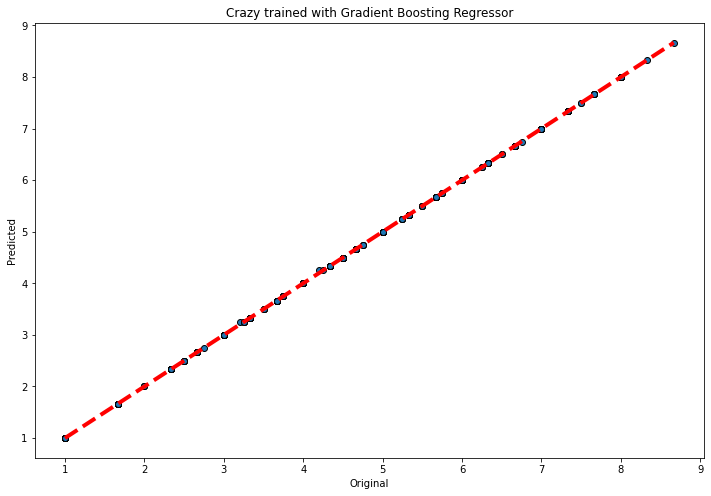

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_test_cz, y_pred_cz_gbc, edgecolors=(0, 0, 0))
ax.plot([min(y_test_cz), max(y_test_cz)], [min(y_test_cz), max(y_test_cz)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
ax.set_title('Crazy trained with Gradient Boosting Regressor')
plt.show()

R2 score of Gradient Boosting Regressor is close to 1, which is close to perfect, on the other hand, r2 score of the linear regression model is 0.44.
We can also see the performance of two models with plots,  Gradient Boosting Regressor performance almost perfectly

- Task 1.4.3 **Discuss** : Why does the Gradient Boosting Regressor perform so much better?

With `Gradient Boosting Regressor`, in the traing, the model will imporve by correcting the residuals with previous models to minimizes the overall prediction error.  So each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

- Task 1.5.1 Write modular code (i.e., a function) to divide your training data into  𝑁  folds and perform cross-validation.

In [47]:

###Task 1.5.1 ###

'''
Function goal: using corss validation to find the best hyper parameters from input hyper parameters candidates
Function input: x = train set with features, y = true labels, n_fold = number to spilt in cross validation, 
                n_estmators = hyper parameter fot grandient boosting regressor, 
                learning_rate = hyper parameter fot grandient boosting regressor
Function output: comparison = a dataframe with  'n_estimator','learning_rate','r2_score','90%_CI as columns
'''

def serch_hyperparamter(x,y,n_fold,n_estimators,learning_rate):
    res = []
    
    # run different senarios 
    for esti in n_estimators:
         for lr in learning_rate:
            #define training model type 
            gbs = GradientBoostingRegressor(n_estimators=esti, learning_rate=lr)
            # run cross validation from skleran ,set score as r2
            r2 = cross_val_score(gbs, x, y, cv=n_fold, scoring="r2")
            
            #compute 90%CI of r2 mean 
            sample_size = len(r2)
            lower, upper, _ = bootstrap_CI(r2,sample_size,10000,"mean")
            #store the result
            res += [[esti, lr, round(np.array(r2).mean(),4),[round(lower,2),round(upper,2)]]]
            
    #final comparison as dataframe
    comparison = pd.DataFrame(res,columns=['n_estimator','learning_rate','r2_score','90%_CI'])
    return comparison

- Task 1.5.2  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: n_estimators and learning_rate.

In [48]:
### Task 1.5.2 ###
#processing data make it ready to train
train_data, test_data = split_set(model_data)
x_data,y_data = split_x_y(train_data,features,prediction)
x_test,y_test = split_x_y(test_data,features,prediction)

# define hyper parameters candidates
n_estimators = [50,75,100,150,200,250]
learning_rate = [0.1,0.05,0.01]

#corss validation folder size
n_fold = 20 
# make comparsion on different hyper parameters candidates
comparison = serch_hyperparamter(x_data,y_data,n_fold,n_estimators,learning_rate)

In [49]:
#the mean  𝑅2  along with the 90% CI for the 18 scenarios.
comparison

,n_estimator,learning_rate,r2_score,90%_CI
0,50,0.10,0.0997,"[0.08, 0.12]"
1,50,0.05,0.0985,"[0.08, 0.12]"
2,50,0.01,0.0573,"[0.05, 0.07]"
3,75,0.10,0.0948,"[0.07, 0.12]"
4,75,0.05,0.0995,"[0.08, 0.12]"
5,75,0.01,0.0726,"[0.06, 0.08]"
6,100,0.10,0.0895,"[0.07, 0.11]"
7,100,0.05,0.0999,"[0.08, 0.12]"
8,100,0.01,0.0823,"[0.07, 0.09]"
9,150,0.10,0.0797,"[0.05, 0.1]"


In [50]:
#choose  parameters with which the model has maximal r2 score
max_r2 = comparison.r2_score.max()
best_para = comparison.loc[comparison.r2_score == max_r2 ]
best_para 

,n_estimator,learning_rate,r2_score,90%_CI
7,100,0.05,0.0999,"[0.08, 0.12]"


- Task 1.5.3 With the best hyper-parameters obtained, train your model with the entire training set and report the  𝑅2  on the testing set.

In [51]:
###Task 1.5.3####
#define hyper parameters
n_est = best_para.n_estimator.values[0]
lr = best_para.learning_rate.values[0]
print("According to the comparsion: train the whole training data with n_estimator = {0} and learning_rate = {1}".format(n_est,lr))

According to the comparsion: train the whole training data with n_estimator = 100 and learning_rate = 0.05


Remark: cross validation split training data randmonly into n_fold folders, the hyper parameters are not always same after running cross validation each time, so the chosen hyper parameters are according to the latest run of cross validation
    

In [52]:
#train model with  Gradient Boosting Regression
gbc_tuned = GradientBoostingRegressor(n_estimators=n_est, learning_rate=lr).fit(x_data, y_data)

#make prediction
y_pred = gbc_tuned.predict(x_test)

In [53]:
#report r2 score
r2_tuned = r2_score(y_test ,y_pred)
print("R2 score with Gradient Boosting Regression in better parameters {:.4f}".format(r2_tuned))

R2 score with Gradient Boosting Regression in better parameters 0.0992


- Task 1.5.4 **Discuss**: Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

To aviod overfitting.
More specifcally, test set is unknow data to test how well our model is, so that the model generalizes well on unseen dataset. If we use test set tune the hyper-parameters, it means we also use test set to train the model which will cause overfitting. Thus we need cross validation which only use train data to find right parameters. 